In [113]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

import seaborn as sns
sns.set(style="white",color_codes=True)
sns.set(font_scale=1.5)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics

In [2]:
train = pd.read_csv('downloads/bigmart_train.csv')

In [3]:
train.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train.shape

(8523, 12)

In [5]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [7]:
train['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [8]:
train['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [11]:
train['Outlet_Age']=2018-train['Outlet_Establishment_Year']
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,19
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,9
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,19
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,31


In [12]:
train['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [13]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Age
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914,20.168133
std,4.643456,0.051598,62.275067,8.371760,1706.499616,8.371760
min,4.555000,0.000000,31.290000,1985.000000,33.290000,9.000000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400,14.000000
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000,19.000000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400,31.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,33.000000


In [14]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [16]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [17]:
train['Outlet_Size'].mode()[0]

'Medium'

In [19]:
train['Outlet_Size']=train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

<AxesSubplot:>

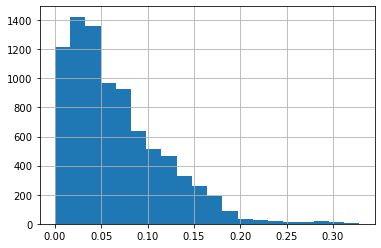

In [20]:
train['Item_Visibility'].hist(bins=20)

In [23]:
Q1 = train['Item_Visibility'].quantile(0.25)
Q3 = train['Item_Visibility'].quantile(0.75)
IQR = Q3 - Q1
filt_train = train.query('(@Q1 - 1.5*@IQR) <= Item_Visibility <= (@Q3 + 1.5*@IQR)')

In [24]:
filt_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,19
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,9
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,19
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,20
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,31
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,16
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,14
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,9


In [25]:
filt_train.shape, train.shape

((8379, 13), (8523, 13))

In [26]:
train = filt_train
train.shape

(8379, 13)

In [27]:
train['Item_Visibility_bins'] = pd.cut(train['Item_Visibility'],[0.000, 0.065, 0.13, 0.2], labels=['Low Viz','Viz','High Viz'])

<ipython-input-27-416cc23be12a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Item_Visibility_bins'] = pd.cut(train['Item_Visibility'],[0.000, 0.065, 0.13, 0.2], labels=['Low Viz','Viz','High Viz'])


In [28]:
train['Item_Visibility_bins'].value_counts()

Low Viz     4403
Viz         2557
High Viz     893
Name: Item_Visibility_bins, dtype: int64

In [29]:
train['Item_Visibility_bins'] = train['Item_Visibility_bins'].replace(np.nan,'Low Viz',regex=True)

<ipython-input-29-681a17841ebe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Item_Visibility_bins'] = train['Item_Visibility_bins'].replace(np.nan,'Low Viz',regex=True)


In [30]:
train['Item_Fat_Content']=train['Item_Fat_Content'].replace(['Low fat','LF'],'Low Fat')

<ipython-input-30-0f256c3974f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Item_Fat_Content']=train['Item_Fat_Content'].replace(['Low fat','LF'],'Low Fat')


In [31]:
train['Item_Fat_Content']=train['Item_Fat_Content'].replace('reg','Regular')

<ipython-input-31-83a07b243b6c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Item_Fat_Content']=train['Item_Fat_Content'].replace('reg','Regular')


In [32]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Visibility_bins
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,19,Low Viz
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,9,Low Viz
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,19,Low Viz
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,20,NaN
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,31,NaN


In [33]:
le = LabelEncoder()

In [35]:
train["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat'], dtype=object)

In [36]:
train['Item_Fat_Content']=le.fit_transform(train['Item_Fat_Content'])

<ipython-input-36-340c77edd03e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Item_Fat_Content']=le.fit_transform(train['Item_Fat_Content'])


In [37]:
train['Item_Visibility_bins']=le.fit_transform(train['Item_Visibility_bins'])

<ipython-input-37-cad57eb2b63e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Item_Visibility_bins']=le.fit_transform(train['Item_Visibility_bins'])


In [38]:
train['Outlet_Size']=le.fit_transform(train['Outlet_Size'])

<ipython-input-38-56ba6286dd58>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Outlet_Size']=le.fit_transform(train['Outlet_Size'])


In [39]:
train['Outlet_Location_Type']=le.fit_transform(train['Outlet_Location_Type'])

<ipython-input-39-8701fb90c339>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Outlet_Location_Type']=le.fit_transform(train['Outlet_Location_Type'])


In [41]:
dummy = pd.get_dummies(train['Outlet_Type'])
dummy.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [42]:
train = pd.concat([train,dummy],axis=1)

In [43]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                   object
Item_Outlet_Sales            float64
Outlet_Age                     int64
Item_Visibility_bins           int32
Grocery Store                  uint8
Supermarket Type1              uint8
Supermarket Type2              uint8
Supermarket Type3              uint8
dtype: object

In [47]:
train = train.drop(['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Type','Outlet_Establishment_Year'],axis=1)

In [48]:
train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Item_Outlet_Sales',
       'Outlet_Age', 'Item_Visibility_bins', 'Grocery Store',
       'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'],
      dtype='object')

In [49]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Age,Item_Visibility_bins,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.30,0,0.016047,249.8092,1,0,3735.1380,19,1,0,1,0,0
1,5.92,1,0.019278,48.2692,1,2,443.4228,9,1,0,0,1,0
2,17.50,0,0.016760,141.6180,1,0,2097.2700,19,1,0,1,0,0
3,19.20,1,0.000000,182.0950,1,2,732.3800,20,3,1,0,0,0
4,8.93,0,0.000000,53.8614,0,2,994.7052,31,3,0,1,0,0


In [52]:
X = train.drop('Item_Outlet_Sales',axis=1)
y = train.Item_Outlet_Sales

In [61]:
test = pd.read_csv('downloads/bigmart_test.csv')

In [56]:
test['Outlet_Size']=test['Outlet_Size'].fillna('Medium')

In [57]:
test['Item_Visibility_bins']=pd.cut(test['Item_Visibility'],[0.000,0.065,0.13,0.2], labels=['Low Viz','Viz','High Viz'])

In [69]:
test['Item_Weight']=test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [80]:
test['Item_Visibility_bins']=test['Item_Visibility'].fillna('Low Viz')
test['Item_Visibility_bins'].head()

0    0.007565
1    0.038428
2    0.099575
3    0.015388
4    0.118599
Name: Item_Visibility_bins, dtype: float64

In [75]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [81]:
test['Item_Fat_Content']=test['Item_Fat_Content'].replace(['Low fat','LF'],'Low Fat')

In [83]:
test['Item_Fat_Content']=test['Item_Fat_Content'].replace('reg','Regular')

In [88]:
test['Item_Fat_Content']=le.fit_transform(test['Item_Fat_Content'])

In [89]:
test['Item_Visibility_bins']=le.fit_transform(test['Item_Visibility_bins'])

In [90]:
test['Outlet_Size']=le.fit_transform(test['Outlet_Size'])

In [91]:
test['Outlet_Location_Type']=le.fit_transform(test['Outlet_Location_Type'])

In [93]:
test['Outlet_Age']=le.fit_transform(test['Outlet_Establishment_Year'])

In [94]:
dummy= pd.get_dummies(test['Outlet_Type'])
test = pd.concat([test,dummy],axis=1)

In [96]:
X_test = test.drop(['Item_Identifier','Item_Type','Outlet_Type','Outlet_Establishment_Year'],axis=1)

In [97]:
X.columns,X_test.columns

(Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
        'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Age',
        'Item_Visibility_bins', 'Grocery Store', 'Supermarket Type1',
        'Supermarket Type2', 'Supermarket Type3'],
       dtype='object'),
 Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
        'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
        'Item_Visibility_bins', 'Outlet_Age', 'Grocery Store',
        'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'],
       dtype='object'))

In [150]:
from sklearn import model_selection
xtrain,xtest,ytrain,ytest=model_selection.train_test_split(X,y,test_size=0.3,random_state=42)

In [151]:
lin = LinearRegression()

In [152]:
lin.fit(xtrain,ytrain)
print(lin.coef_)
lin.intercept_

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [154]:
predictions = lin.predict(xtest)
print(sqrt(mean_squared_error(ytest,predictions)))

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
from sklearn.linear_model import Ridge

In [155]:
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=0.001,normalize=True)
ridgereg.fit(xtrain,ytrain)
print(sqrt(mean_squared_error(ytrain,ridgereg.predict(xtrain))))
print(sqrt(mean_squared_error(ytest,ridgereg.predict(xtest))))
print('R2 Value: {}'.format(ridgereg.score(xtest)))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [137]:
conda update scikit-learn

Solving environment: ...working... 

Updating scikit-learn is constricted by 

anaconda -> requires scikit-learn==0.24.1=py38hf11a4ad_0

If you are sure you want an update of your package either try `conda update --all` or install a specific version of the package you want using `conda install <pkg>=<version>`

done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [138]:
conda update --all

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\uj321\anaconda3


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _anaconda_depends-2020.07  |           py38_0           6 KB
    anaconda-custom            |           py38_1          36 KB
    anaconda-client-1.8.0      |   py38haa95532_0         170 KB
    anaconda-project-0.10.1    |     pyhd3eb1b0_0         218 KB
    astroid-2.6.6              |   py38haa95532_0         314 KB
    astropy-4.3.1              |   py38hc7d831d_0         6.1 MB
    attrs-21.2.0               |     pyhd3eb1b0_0          46 KB
    babel-2.9.1                |     pyhd3eb1b0_0         5.5 MB
    bitarray-2.3.0             |   py38h2bbff1b_1         141 KB
    bleach-4.0.0               |     pyhd3eb1b0_0         113 KB
    bokeh-2.3.3                |   py38haa95532_0         5.8 MB
    ca-certificates-2021.7.5 

DEBUG menuinst_win32:__init__(198): Menu: name: 'Anaconda${PY_VER} ${PLATFORM}', prefix: 'C:\Users\uj321\anaconda3', env_name: 'None', mode: 'user', used_mode: 'user'
DEBUG menuinst_win32:create(323): Shortcut cmd is C:\Users\uj321\anaconda3\python.exe, args are ['C:\\Users\\uj321\\anaconda3\\cwp.py', 'C:\\Users\\uj321\\anaconda3', 'C:\\Users\\uj321\\anaconda3\\python.exe', 'C:\\Users\\uj321\\anaconda3\\Scripts\\jupyter-notebook-script.py', '"%USERPROFILE%/"']
DEBUG menuinst_win32:__init__(198): Menu: name: 'Anaconda${PY_VER} ${PLATFORM}', prefix: 'C:\Users\uj321\anaconda3', env_name: 'None', mode: 'user', used_mode: 'user'
DEBUG menuinst_win32:create(323): Shortcut cmd is C:\Users\uj321\anaconda3\python.exe, args are ['C:\\Users\\uj321\\anaconda3\\cwp.py', 'C:\\Users\\uj321\\anaconda3', 'C:\\Users\\uj321\\anaconda3\\python.exe', 'C:\\Users\\uj321\\anaconda3\\Scripts\\jupyter-notebook-script.py', '"%USERPROFILE%/"']
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(143): Cou

pyerfa-2.0.0         | 360 KB    | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... 

    Windows 64-bit packages of scikit-learn can be accelerated using scikit-learn-intelex.
    More details are available here: https://intel.github.io/scikit-learn-intelex

    For example:

        $ conda install scikit-learn-intelex
        $ python -m sklearnex my_application.py


done
